In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Reshape

from matplotlib import pyplot as plt
import numpy as np

In [16]:
%matplotlib inline

In [2]:
#tf.debugging.set_log_device_placement(True)

In [3]:
tf.test.is_gpu_available()

True

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

num_classes = 10

# convert class vectors to binary class matrices

60000 train samples
10000 test samples


In [5]:
def zeropad(dataset,n=2):
    return np.pad(dataset,((0,0),(n,n),(n,n)))

In [6]:
x_train = zeropad(x_train)
x_test = zeropad(x_test)

In [7]:
x_train = x_train[:,:,:,np.newaxis]
x_test = x_test[:,:,:,np.newaxis]

In [8]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

In [9]:
BATCH_SIZE = 32
EPOCHS = 20
STEPS_PER_EPOCH = 60000//BATCH_SIZE

In [10]:
LeNet5 = tf.keras.Sequential([Conv2D(filters = 6, kernel_size=(5,5), strides=(1,1),activation='relu', input_shape = (32,32,1)),
                             AveragePooling2D(pool_size=(2,2)),
                             Conv2D(filters = 16, kernel_size = (5,5), strides=(1,1), activation='relu'),
                             AveragePooling2D(pool_size=(2,2)), 
                             Flatten(),
                             Dense(120,activation='relu'),
                             Dense(84, activation='relu'),
                             Dense(10, activation='softmax')])

In [11]:
LeNet5.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [12]:
LeNet5.compile(optimizer=tf.keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
history = LeNet5.fit(x=x_train,y=y_train_one_hot,batch_size=BATCH_SIZE,epochs=EPOCHS,steps_per_epoch=STEPS_PER_EPOCH)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 77us/sample - loss: 0.7313 - accuracy: 0.7785
Epoch 2/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2047 - accuracy: 0.9387
Epoch 3/20
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1471 - accuracy: 0.9566
Epoch 4/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.1158 - accuracy: 0.9657
Epoch 5/20
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0952 - accuracy: 0.9707
Epoch 6/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0819 - accuracy: 0.9753
Epoch 7/20
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0731 - accuracy: 0.9774
Epoch 8/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0654 - accuracy: 0.9805
Epoch 9/20
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0596 - accuracy: 0.9815
Epoch 10/20
60

In [85]:
layer_outputs = [layer.output for layer in LeNet5.layers]
activation_model = tf.keras.models.Model(inputs=LeNet5.input, outputs=layer_outputs)

In [125]:
layer_outputs

[<tf.Tensor 'conv2d/Identity:0' shape=(None, 28, 28, 6) dtype=float32>,
 <tf.Tensor 'average_pooling2d/Identity:0' shape=(None, 14, 14, 6) dtype=float32>,
 <tf.Tensor 'conv2d_1/Identity:0' shape=(None, 10, 10, 16) dtype=float32>,
 <tf.Tensor 'average_pooling2d_1/Identity:0' shape=(None, 5, 5, 16) dtype=float32>,
 <tf.Tensor 'flatten/Identity:0' shape=(None, 400) dtype=float32>,
 <tf.Tensor 'dense/Identity:0' shape=(None, 120) dtype=float32>,
 <tf.Tensor 'dense_1/Identity:0' shape=(None, 84) dtype=float32>,
 <tf.Tensor 'dense_2/Identity:0' shape=(None, 10) dtype=float32>]

In [93]:
activations = activation_model.predict(x_test)

In [145]:
print(activations[2].shape)

(10000, 10, 10, 16)


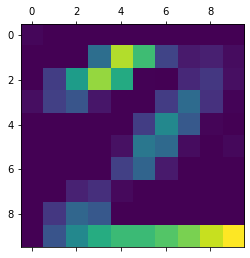

In [155]:
plt.matshow(activations[2][1,:,:,10])

In [ ]:
class LeNet5b(tf.keras.Model):
    
    def __init__(self):
        super(LeNet5b,self).__init__()
        self.conv1 = Conv2D(filters = 6, kernel_size=(5,5), strides=(1,1),activation='relu', input_shape = (32,32,1))
        self.pool1 = AveragePooling2D(pool_size=(2,2))
        self.conv2 = Conv2D(filters = 16, kernel_size = (5,5), strides=(1,1), activation='relu')
        self.pool2 = AveragePooling2D(pool_size=(2,2))
        self.flatten = Flatten()
        self.fc1 = Dense(120,activation='relu')
        self.fc2 = Dense(84, activation='relu')
        self.fc3 = Dense(10, activation='softmax')
        
    def call(self,x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        return self.fc3(x)

In [ ]:
lenet5b = LeNet5b()
lenet5b.compile(optimizer=tf.keras.optimizers.SGD(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = lenet5b.fit(x_train,y_train_one_hot,batch_size=BATCH_SIZE,epochs=EPOCHS,steps_per_epoch=STEPS_PER_EPOCH, shuffle=True, verbose=1)

In [ ]:
def mlp_class(predictions):
    return np.argmax(predictions,axis = 1)

def score(y_true,predictions):
    predictions = mlp_class(predictions)
    return np.sum(y_true == predictions)/10000

In [ ]:
predictions = lenet5b.predict(x_test)

In [ ]:
accuracy = score(y_test,predictions)

In [ ]:
print("Accuracy: {}".format(accuracy))